<a href="https://colab.research.google.com/github/Guism92/Data-Analysis/blob/main/SistematizacaoCD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importação das bibliotecas para o projeto
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
#Optei por juntar duas bases de dados, porque achei que o dataset inicial não possibilitaria responder à 3 perguntas

#Importação das bases de dados
path = kagglehub.dataset_download("redpen12/employees-satisfaction-analysis")
print("Path to dataset files:", path)

path2 = kagglehub.dataset_download("ravindrasinghrana/employeedataset")
print("Path to dataset files:", path2)

#Criação de DataFrames
df = pd.read_csv(path + "/Employee Attrition.csv")
df2 = pd.read_csv(path2 + "/employee_data.csv")

100%|██████████| 140k/140k [00:00<00:00, 42.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/redpen12/employees-satisfaction-analysis/versions/2


100%|██████████| 520k/520k [00:00<00:00, 42.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ravindrasinghrana/employeedataset/versions/2


In [4]:
#Verificação das primeiras linhas df
df.head(10)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low
5,6.0,0.41,0.50,2.0,153.0,3.0,0.0,0.0,sales,low
6,7.0,0.10,0.77,6.0,247.0,4.0,0.0,0.0,sales,low
7,8.0,0.92,0.85,5.0,259.0,5.0,0.0,0.0,sales,low
8,9.0,0.89,1.00,5.0,224.0,5.0,0.0,0.0,sales,low
9,10.0,0.42,0.53,2.0,142.0,3.0,0.0,0.0,sales,low


In [5]:
#Verificação das primeiras linhas df2
df2.head(5)

,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,Division,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,3427,Uriah,Bridges,20-Sep-19,NaN,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,Finance & Accounting,07-10-1969,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4
1,3428,Paula,Small,11-Feb-23,NaN,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,...,Aerial,30-08-1965,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3
2,3429,Edward,Buck,10-Dec-18,NaN,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,...,General - Sga,06-10-1991,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4
3,3430,Michael,Riordan,21-Jun-21,NaN,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,...,Finance & Accounting,04-04-1998,ND,Clerk,Male,58782,Other,Single,Fully Meets,2
4,3431,Jasmine,Onque,29-Jun-19,NaN,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,...,General - Con,29-08-1969,FL,Laborer,Female,33174,Other,Married,Fully Meets,3


In [6]:
#Drop da coluna de ID principal
df2.drop('EmpID', axis=1, inplace=True)

In [162]:
#Criação de um novo ID
df2['IDnovo'] = range(1, len(df2) + 1)

In [69]:
df2.head(10)

,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,EmployeeType,...,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating,Employee ID,ID novo
0,Uriah,Bridges,20-Sep-19,NaN,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,Contract,...,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4,1,1
1,Paula,Small,11-Feb-23,NaN,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,Contract,...,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3,2,2
2,Edward,Buck,10-Dec-18,NaN,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,Full-Time,...,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4,3,3
3,Michael,Riordan,21-Jun-21,NaN,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,Contract,...,ND,Clerk,Male,58782,Other,Single,Fully Meets,2,4,4
4,Jasmine,Onque,29-Jun-19,NaN,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,Contract,...,FL,Laborer,Female,33174,Other,Married,Fully Meets,3,5,5
5,Maruk,Fraval,17-Jan-20,NaN,Area Sales Manager,Sheri Campos,maruk.fraval@bilearner.com,BPC,Active,Contract,...,CT,Driver,Male,6050,Black,Married,Fully Meets,3,6,6
6,Latia,Costa,06-Apr-22,03-Jul-23,Area Sales Manager,Jacob Braun,latia.costa@bilearner.com,WBL,Active,Full-Time,...,CA,Technician,Female,90007,Hispanic,Divorced,Exceeds,4,7,7
7,Sharlene,Terry,06-Nov-20,29-Jan-23,Area Sales Manager,Tracy Marquez,sharlene.terry@bilearner.com,CCDR,Active,Contract,...,OR,Engineer,Female,97756,White,Divorced,Fully Meets,2,8,8
8,Jac,McKinzie,18-Aug-18,NaN,Area Sales Manager,Sharon Becker,jac.mckinzie@bilearner.com,NEL,Active,Contract,...,TX,Executive Assistant,Male,78789,Black,Widowed,Exceeds,3,9,9
9,Joseph,Martins,21-Jan-22,29-Jun-23,Area Sales Manager,George Jenkins,joseph.martins@bilearner.com,BPC,Active,Part-Time,...,TX,Engineer,Male,78207,Asian,Widowed,Fully Meets,5,10,10


In [163]:
#Deleta linhas duplicadas
df.drop_duplicates(subset='Emp ID', inplace=True)
df2.drop_duplicates(subset='IDnovo', inplace=True)

In [97]:
#Junta as duas tabelas para fazer uma base com mais colunas
df3 = pd.merge(df, df2, left_on='Emp ID', right_on='IDnovo', how='inner')

In [99]:
#Dropa a coluna IDnovo
df3.drop('IDnovo', axis=1, inplace=True)

#Verificação dos tipo das colunas
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Emp ID                      3000 non-null   float64
 1   satisfaction_level          3000 non-null   float64
 2   last_evaluation             3000 non-null   float64
 3   number_project              3000 non-null   float64
 4   average_montly_hours        3000 non-null   float64
 5   time_spend_company          3000 non-null   float64
 6   Work_accident               3000 non-null   float64
 7   promotion_last_5years       3000 non-null   float64
 8   dept                        3000 non-null   object 
 9   salary                      3000 non-null   object 
 10  FirstName                   3000 non-null   object 
 11  LastName                    3000 non-null   object 
 12  StartDate                   3000 non-null   object 
 13  ExitDate                    1533 

In [100]:
#Medidas estatísticas sobre os dados das colunas
df3.describe()
## Nota-se que a base tem 14999 linhas, sendo o nível de satisfação médio de 0,51385 de um intervalo de 0 a 1,
## 75% dos funcionários tem até 4 anos de empresa, sendo que a pessoa que mais trabalha mensalmente na empresa faz
## cerca de 3 vezes a carga horária da pessoa que menos trabalha.
## Além disso, não parece que as promoções sejam algo frequenta na companhia.

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,LocationCode,Current Employee Rating
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,0.513850,0.719460,3.850333,204.125333,3.624333,0.094667,0.002667,44997.180667,2.969000
std,866.169729,0.270798,0.186313,1.591051,56.862443,1.059677,0.292803,0.051579,29987.331783,1.015078
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,1013.000000,1.000000
25%,750.750000,0.370000,0.530000,2.000000,149.000000,3.000000,0.000000,0.000000,17546.000000,2.000000
50%,1500.500000,0.450000,0.750000,4.000000,207.000000,3.000000,0.000000,0.000000,44150.500000,3.000000
75%,2250.250000,0.770000,0.890000,5.000000,255.000000,4.000000,0.000000,0.000000,71481.250000,3.000000
max,3000.000000,1.000000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000,98052.000000,5.000000


In [106]:
#Verificação dos valores nulos
df3.isnull().sum()
##Encontrou-se 1467 linhas nulas nas coluna ExitDate e Termination Descrition , mas esses dados só deve existir para funcionários que já se deligaram da empresa

,0
Emp ID,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
promotion_last_5years,0
dept,0
salary,0


# Pergunta 1 - Qual a satisfação dos funcionários?

In [141]:
# Considera satisfeito quem tem  satisfaction_level >= 0.5
df3['satisfeito'] = (df3['satisfaction_level'] >= 0.5).astype(int)

# Cria um DF com variáveis
df3 = df3[[
    'satisfaction_level',
    'last_evaluation',
    'number_project',
    'average_montly_hours',
    'time_spend_company',
    'Work_accident',
    'promotion_last_5years',
    'satisfeito'
]]

In [142]:
# Seta X e Y
X = df3.drop(['satisfaction_level', 'satisfeito'], axis=1)
y = df3['satisfeito']

Matriz de Confusão:
 [[423  58]
 [ 21 398]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       481
           1       0.87      0.95      0.91       419

    accuracy                           0.91       900
   macro avg       0.91      0.91      0.91       900
weighted avg       0.92      0.91      0.91       900



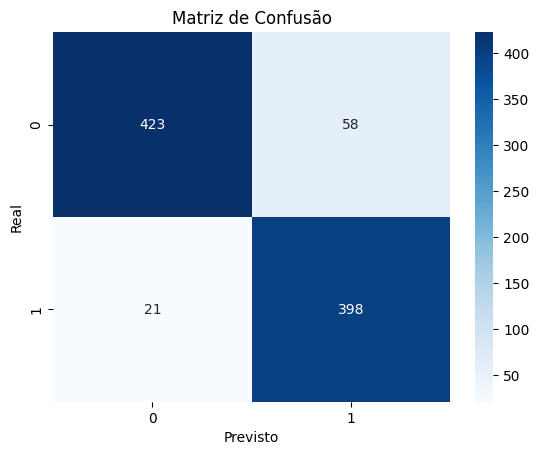

In [150]:
# Separar as variáveis alvo
X = df3.drop(['satisfaction_level', 'satisfeito'], axis=1)
y = df3['satisfeito']

# Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treina o modelo e faz previsões
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Printa os resultados
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


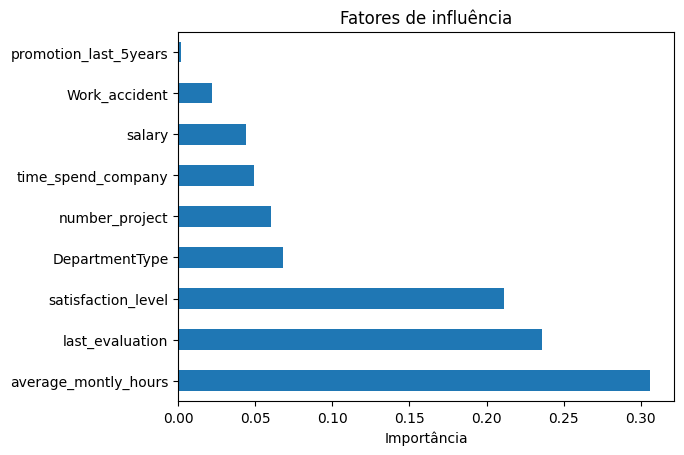

In [212]:
# Gráfico dos atributos mais importantes
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Fatores de influência')
plt.xlabel('Importância')
plt.show()

#Resultado
## De acordo com o resultado do modelo, percebe-se que o modelo é bom para indentificar os funcionários satisfeitos (recall 95%) e tem uma acurácia geral alta (91%) para um modelo inicial

# Pergunta 2 - Quais os funcionários que irão sair da empresa?

In [220]:
#Junta NOVAMENTE as duas tabelas para fazer uma base com mais colunas
df4 = pd.merge(df, df2, left_on='Emp ID', right_on='IDnovo', how='inner')

#Dropa a coluna IDnovo
df4.drop('IDnovo', axis=1, inplace=True)

df4.columns = df4.columns.str.strip()  # remover espaços invisíveis

#Cria uma coluna para indicar se o funcionário saiu
df4['Saiu'] = df4['ExitDate'].notnull().astype(int)

#Tira os espaços dos nomes das colunas
df4.columns = df4.columns.str.strip()

#Verificação dos tipo das colunas
df4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Emp ID                      3000 non-null   float64
 1   satisfaction_level          3000 non-null   float64
 2   last_evaluation             3000 non-null   float64
 3   number_project              3000 non-null   float64
 4   average_montly_hours        3000 non-null   float64
 5   time_spend_company          3000 non-null   float64
 6   Work_accident               3000 non-null   float64
 7   promotion_last_5years       3000 non-null   float64
 8   dept                        3000 non-null   object 
 9   salary                      3000 non-null   object 
 10  FirstName                   3000 non-null   object 
 11  LastName                    3000 non-null   object 
 12  StartDate                   3000 non-null   object 
 13  ExitDate                    1533 

In [196]:
# Seleciona as variáveis
variaveis = [
    'satisfaction_level',
    'last_evaluation',
    'number_project',
    'average_montly_hours',
    'time_spend_company',
    'Work_accident',
    'promotion_last_5years',
    'salary',
    'DepartmentType'
]

df_modelo = df4[variaveis + ['Saiu']].copy()

In [204]:
#Transforma as variáveis categóricas
df_modelo = pd.get_dummies(df_modelo, drop_first=True)

# Seta X e Y
X = df_modelo.drop('Saiu', axis=1)
y = df_modelo['Saiu']


# Separa as bases (treino e teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [218]:
# Treina o modelo e faz previsões
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Matriz de Confusão Saídas:
 [[217 223]
 [222 238]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.49      0.49      0.49       440
           1       0.52      0.52      0.52       460

    accuracy                           0.51       900
   macro avg       0.51      0.51      0.51       900
weighted avg       0.51      0.51      0.51       900



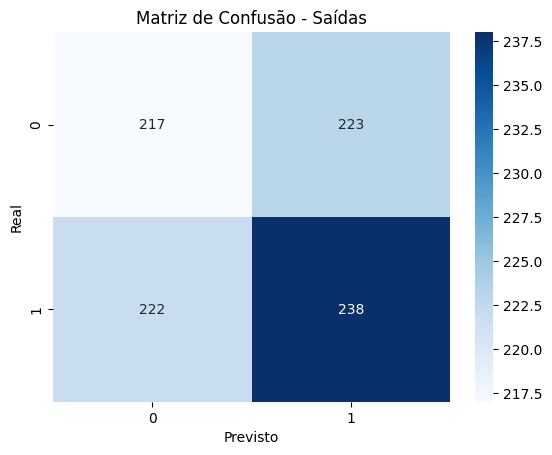

In [219]:
# Printa os resultados
print("Matriz de Confusão Saídas:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Saídas')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


#Resultado
## De acordo com o resultado do modelo, percebe-se que o modelo não é muito bom para identificar os funcionários que saíram da empresa (recall 52%) e tem uma acurácia geral baixa, de apenas 51%. Isso indica que precisa ser melhorado, um possível fator para essa melhora seria a inclusão de mais dados na base para treinamento.

# Pergunta 3 - Quais as personsas dos funcionários da empresa?


In [223]:
#Junta NOVAMENTE as duas tabelas para fazer uma base com mais colunas
df5 = pd.merge(df, df2, left_on='Emp ID', right_on='IDnovo', how='inner')

#Dropa a coluna IDnovo
df5.drop('IDnovo', axis=1, inplace=True)

#Tira os espaços dos nomes das colunas
df5.columns = df5.columns.str.strip()

#Verificação dos tipo das colunas
df5.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Emp ID                      3000 non-null   float64
 1   satisfaction_level          3000 non-null   float64
 2   last_evaluation             3000 non-null   float64
 3   number_project              3000 non-null   float64
 4   average_montly_hours        3000 non-null   float64
 5   time_spend_company          3000 non-null   float64
 6   Work_accident               3000 non-null   float64
 7   promotion_last_5years       3000 non-null   float64
 8   dept                        3000 non-null   object 
 9   salary                      3000 non-null   object 
 10  FirstName                   3000 non-null   object 
 11  LastName                    3000 non-null   object 
 12  StartDate                   3000 non-null   object 
 13  ExitDate                    1533 

In [248]:
# Seleciona as variaveis
variaveis = [
    'satisfaction_level',
    'last_evaluation',
    'number_project',
    'average_montly_hours',
    'time_spend_company'
]

# Cria um dataframe para o cluster
df_cluster = df5[variaveis].dropna()


In [239]:
# Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

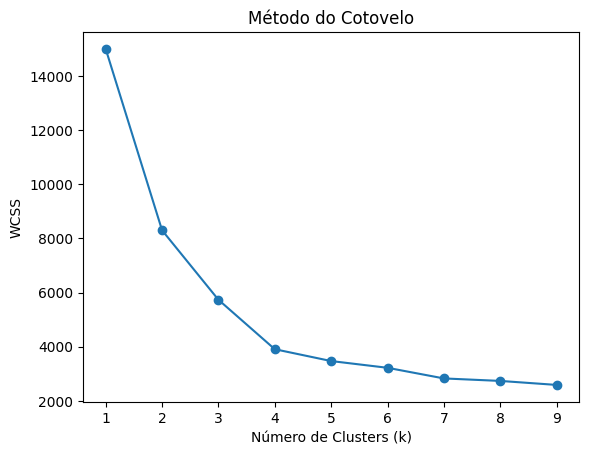

In [242]:
# Método do Cotovelo
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [244]:
# Roda o kmeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)



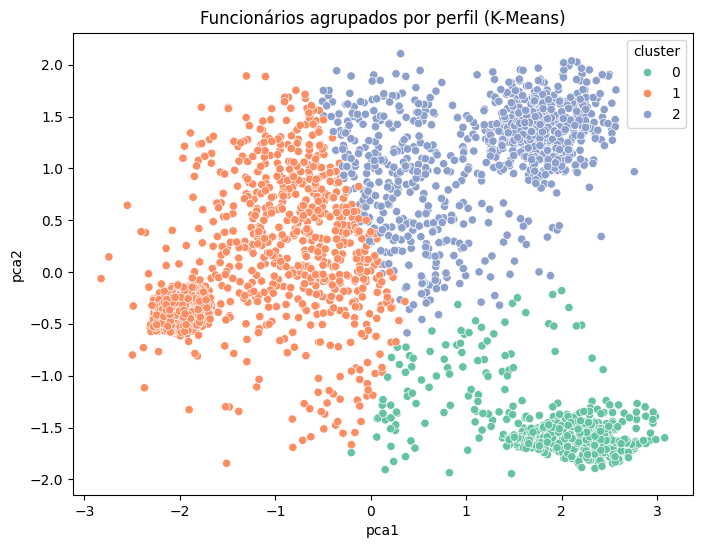

In [245]:
# Gera o gráfico de clusters
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

df_cluster['pca1'] = components[:, 0]
df_cluster['pca2'] = components[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cluster, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('Funcionários agrupados por perfil (K-Means)')
plt.show()

In [247]:
# Perfil de cada cluster
df_cluster.groupby('cluster')[variaveis].mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
cluster,,,,,
0,0.124760,0.846866,6.046434,267.621891,4.124378
1,0.514446,0.572751,2.693931,162.432058,2.910290
2,0.779137,0.884711,4.337117,232.409762,4.510783


#Resultado:

## Cluster 0 - Insatisfeito : Apresenta baixo grau de satisfação, com uma avaliação alta, mas aparenta estar sobrecarregado pelo alto número de projetos e carga horária mensal, além de já ter um tempo médio de empresa razoavelmente alto

## Cluster 1 - Satisfeito : Apresenta um grau de satisfação médio e uma avalição também média, seu número de projetos é baixa, asism como sua carga horário o que desmonstra uma falta de motivação, além de ter um tempo mais baixo de empresa do que os demais.

## Cluster 2 - Muito Satisfeito: Apresenta o maio grau de satisfação e avaliação, tendo um número de projetos médio entre os outros dois clusters. Além disso tem um tempo considerável de empresa e uma carga horária bastante alta.